# Домашнее задание 2, задача 1. Нахождение ранга корневого дерева

В этом задании требуется реализовать нахождение ранга корневого дерева с помощью поиска в глубину.

*Ранг* определяется для каждой вершины дерева. Для листьев ранг равен нулю. Для промежуточной вершины ранг равен максимуму среди рангов вершин ее потомков, если максимальный ранг среди потомков достигается на одном потомке, и ранг на 1 больше ранга потомков, если максимальный ранг среди потомков достигается сразу на двух потомках. Рангом дерева называется ранг ее корня.

Для примера, ранги вершин дерева на картинке ниже подписаны в самих вершинах. Ранг всего дерева равен 2.

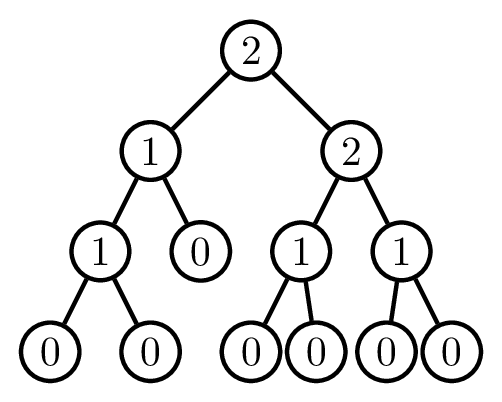


---
**Правила сдачи.** Это первая из двух задач домашнего задания 2. Каждая задача оценивается в 5 баллов.

Дедлайн второго домашнего задания --- **7 октября в 19:00**. Решения нужно отправить по адресу pygraphs.sber@gmail.com. Решения будут проверены до 19:00 8 октября. 

Также можно отправить решения до **19:00 5 октября**. Тогда они будут проверены до 19:00 6 октября и в случае наличия ошибок можно будет успеть их исправить до основного дедлайна.

---

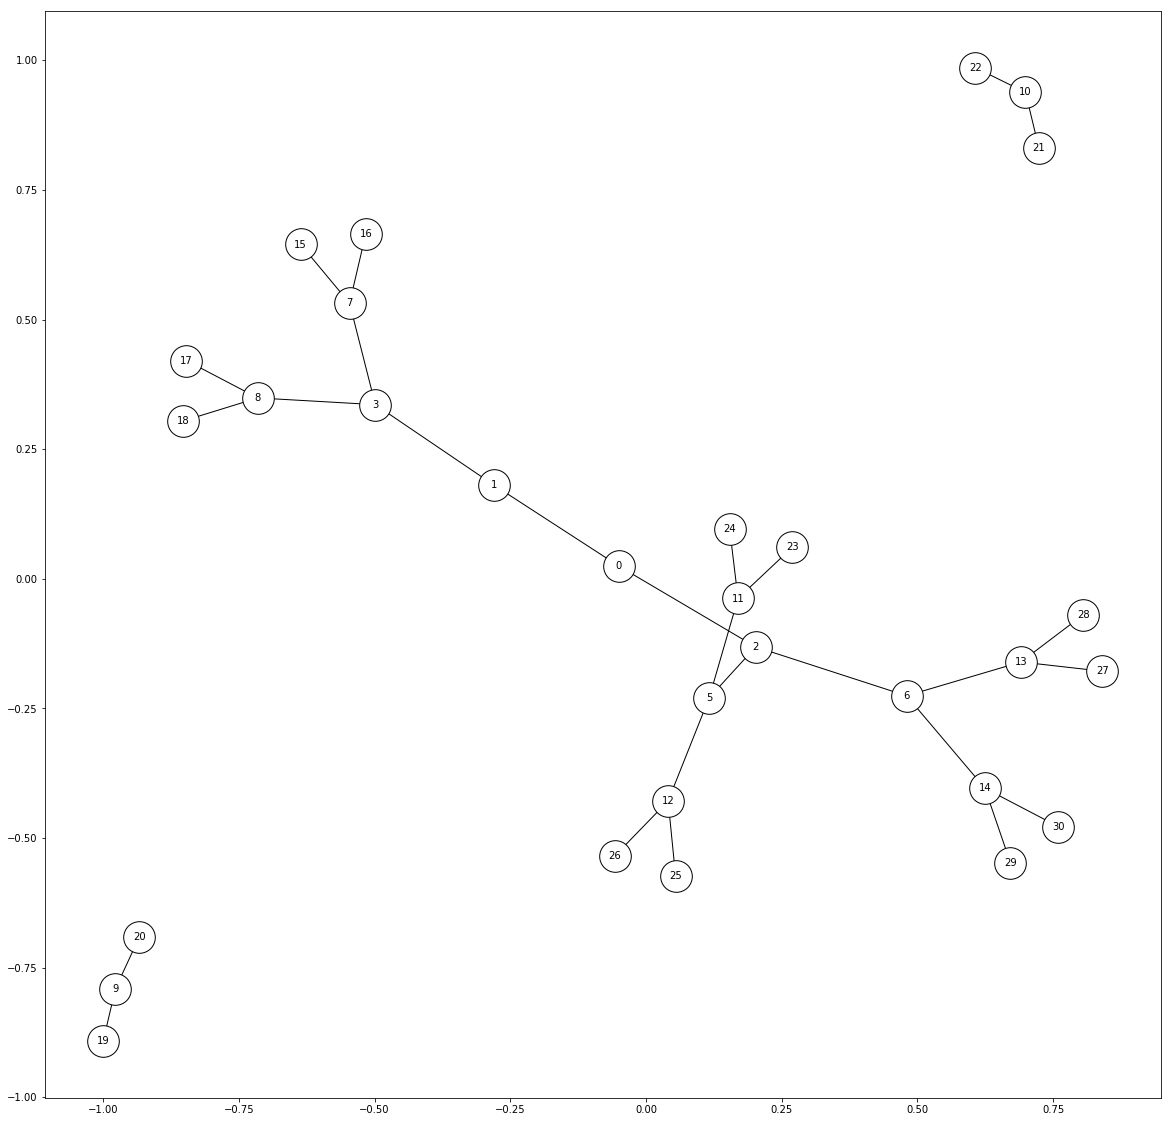

In [200]:
# Задаем граф

import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# В этой строчке задается случайное дерево на 100 вершинах. При каждом перезапуске блока будет создаваться новое дерево.
# tree = nx.random_tree(20)

# В варианте в строчке ниже генерируется регулярное дерево ветвления 4 и глубины 4
tree = nx.generators.classic.balanced_tree(2, 4)
tree.remove_node(4)
# В варианте в строчке ниже генерируется биномиальное дерево порядка 6
# tree = nx.binomial_tree(6)

#nx.draw_networkx(tree)

# Рисуем граф
def draw_G(G):
    options = {
        "font_size": 10,
        "node_size": 1000,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 1,
        "width": 1,
    }
    plt.figure(figsize=(20, 20))
    nx.draw_networkx(G, with_labels=True, **options)
    plt.show()
    
draw_G(tree)

In [179]:
# # В этом блоке нужно реализовать подсчет ранга дерева с помощью поиска в глубину
# # Мы считаем вершину с меткой 0 корнем дерева

# # Заводим множество посещенных вершин
# visited = set()

# # В этой функции мы будем подсчитывать ранг дерева с корнем в вершине v
# def count_rank(v):
#     # Реализуйте здесь ваше решение
#     visited.add(v)
#     _rank, rank = 0, 0
    
#     for u in tree[v]:
        
#         if u not in visited:
#             rank = count_rank(u)
            
#             if rank > max_rank:
#                 max_rank = rank
#             elif rank == max_rank:
#                 max_rank += 1
            
#     return max_rank

# print(f'Ранг дерева: {count_rank(0)}')

In [201]:
# В этом блоке нужно реализовать подсчет ранга дерева с помощью поиска в глубину
# Мы считаем вершину с меткой 0 корнем дерева

# Заводим множество посещенных вершин
visited = set()

# В этой функции мы будем подсчитывать ранг дерева с корнем в вершине v
def count_rank(v):
    # Реализуйте здесь ваше решение
    visited.add(v)
    max_rank = 0
    lst_ranks = []
    for u in tree[v]:
        
        if u not in visited:
            rank = count_rank(u)
            lst_ranks.append(rank)
            
    if len(lst_ranks) > 0:
        max_rank = max(lst_ranks)
        counter_ranks = Counter(lst_ranks)
        if counter_ranks[max_rank] >= 2:
            max_rank += 1
        return max_rank
    else:
        return max_rank
print(f'Ранг дерева: {count_rank(0)}')

Ранг дерева: 3
